In [87]:
import os
import uuid
import numpy as np
from PIL import Image  # Import the Image class from the PIL (Pillow) library
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam


In [79]:
train_dir = "isec-ic\\dataset\\train"
validation_dir = "isec-ic\\dataset\\valid"
test_dir = "isec-ic\\dataset\\test"

current_dir = os.path.dirname(os.path.realpath(__file__ if '__file__' in locals() else os.getcwd()))

train_dir = os.path.join(current_dir, train_dir)
validation_dir = os.path.join(current_dir, validation_dir)
test_dir = os.path.join(current_dir, test_dir)

categories = ["bacterialspot", "healthy", "earlyblight", "lateblight", "targetspot",  "leafmold", "mosaicvirus","yellowleafcurlvirus" ,"spidermite","septorialeafspot"]


In [80]:
def load_images_from_folder(folder):
    images = []
    labels = []
    subfolders = os.listdir(folder)  # list of subfolders in the main folder
    
    for subfolder in subfolders:
        category = subfolder.split("_")[-1].lower()  # category of the subfolder (e.g., "scab" from "Apple___Apple_scab")
        
        if category in categories:
            print("Loading images from category: " + category + " and subfolder: " + subfolder)
            subfolder_path = os.path.join(folder, subfolder)
            
            for filename in os.listdir(subfolder_path):
                img = Image.open(os.path.join(subfolder_path, filename))
                #img = img.resize((224, 224)) # default is 256
                img = np.array(img) / 255.0  # normalization of the pixel values between 0 and 1
                images.append(img)
                labels.append(categories.index(category))  # index of the category in the list of categories
        else:
            print("Category: " + category + " from subfolder " + subfolder + " is not in the list of categories.")

    return np.array(images), np.array(labels)

In [81]:
x_train, y_train = load_images_from_folder(train_dir)
print("Finished to load the train images")

Loading images from category: spidermite and subfolder: Tomato__spidermite
Loading images from category: bacterialspot and subfolder: Tomato___Bacterialspot
Loading images from category: earlyblight and subfolder: Tomato___Earlyblight
Loading images from category: healthy and subfolder: Tomato___healthy
Loading images from category: lateblight and subfolder: Tomato___Lateblight
Loading images from category: leafmold and subfolder: Tomato___Leafmold
Loading images from category: septorialeafspot and subfolder: Tomato___Septorialeafspot
Loading images from category: targetspot and subfolder: Tomato___Targetspot
Loading images from category: mosaicvirus and subfolder: Tomato___Tomato_mosaicvirus
Loading images from category: yellowleafcurlvirus and subfolder: Tomato___Tomato_yellowleafcurlvirus
Finished to load the train images


In [82]:
x_validation, y_validation = load_images_from_folder(validation_dir)
print("Finished to load the validation images")

Loading images from category: bacterialspot and subfolder: Tomato___Bacterialspot
Loading images from category: earlyblight and subfolder: Tomato___Earlyblight
Loading images from category: healthy and subfolder: Tomato___healthy
Loading images from category: lateblight and subfolder: Tomato___Lateblight
Loading images from category: leafmold and subfolder: Tomato___Leafmold
Loading images from category: septorialeafspot and subfolder: Tomato___Septorialeafspot
Loading images from category: spidermite and subfolder: Tomato___Spider_spidermite
Loading images from category: targetspot and subfolder: Tomato___Targetspot
Loading images from category: mosaicvirus and subfolder: Tomato___Tomato_mosaicvirus
Loading images from category: yellowleafcurlvirus and subfolder: Tomato___Tomato_Yellowleafcurlvirus
Finished to load the validation images


In [83]:
x_test, y_test = load_images_from_folder(test_dir)
print("Finished to load the test images");

Loading images from category: bacterialspot and subfolder: tomato_bacterialspot
Loading images from category: earlyblight and subfolder: tomato_earlyblight
Loading images from category: healthy and subfolder: tomato_healthy
Loading images from category: lateblight and subfolder: tomato_lateblight
Loading images from category: leafmold and subfolder: tomato_leafmold
Loading images from category: mosaicvirus and subfolder: tomato_mosaicvirus
Loading images from category: septorialeafspot and subfolder: tomato_Septorialeafspot
Loading images from category: spidermite and subfolder: tomato_spidermite
Loading images from category: targetspot and subfolder: tomato_targetspot
Loading images from category: yellowleafcurlvirus and subfolder: tomato_yellowleafcurlvirus
Finished to load the test images


In [84]:
# Display the total number of images loaded
print("Number of training images: " + str(len(x_train)))
print("Number of validation images: " + str(len(x_validation)))
print("Number of test images: " + str(len(x_test)))

Number of training images: 15000
Number of validation images: 4000
Number of test images: 1000


In [85]:
print("Creating the MLP network")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
print("Finished creating the MLP Model")

Creating the MLP network
Finished creating the MLP Model


In [88]:
print("Starting to train and validate the model")

#training with sgd
#optimizer = SGD(learning_rate=0.01)
#model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training with adam
optimizer = Adam(learning_rate=0.001)  # Taxa de aprendizado de 0.001
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))
print("Finished training and validating the model")

Starting to train and validate the model
Epoch 1/10
469/469 [==============================] - 55s 117ms/step - loss: 5.6547 - accuracy: 0.3129 - val_loss: 2.6094 - val_accuracy: 0.3548
Epoch 2/10
469/469 [==============================] - 44s 95ms/step - loss: 1.9436 - accuracy: 0.3953 - val_loss: 1.9463 - val_accuracy: 0.3640
Epoch 3/10
469/469 [==============================] - 43s 93ms/step - loss: 1.6336 - accuracy: 0.4531 - val_loss: 1.3635 - val_accuracy: 0.5265
Epoch 4/10
469/469 [==============================] - 43s 91ms/step - loss: 1.4302 - accuracy: 0.5190 - val_loss: 1.5331 - val_accuracy: 0.5155
Epoch 5/10
469/469 [==============================] - 43s 92ms/step - loss: 1.2975 - accuracy: 0.5596 - val_loss: 1.6772 - val_accuracy: 0.4848
Epoch 6/10
469/469 [==============================] - 45s 96ms/step - loss: 1.2232 - accuracy: 0.5797 - val_loss: 1.3219 - val_accuracy: 0.5533
Epoch 7/10
469/469 [==============================] - 43s 91ms/step - loss: 1.1625 - accuracy:

32/32 [==============================] - 0s 10ms/step
Confusion Matrix: 
[[55  1 21  4  0  0  0  7  0 12]
 [ 0 83  0  0  0  0  1  0  0 16]
 [ 4  4 58  7  0  0  0  4  2 21]
 [ 4  2 19 63  0  2  1  0  0  9]
 [ 1 12  7  0  8  0  1  0  8 63]
 [ 0  0 16  2  0 44  4  2  5 27]
 [ 0  3  0  0  0  2 86  0  1  8]
 [ 5  0  1  3  0  0  0 86  3  2]
 [ 3  5  2  4  1  0  0 10 49 26]
 [ 0  4  5  3  0  5  4  6  4 69]]


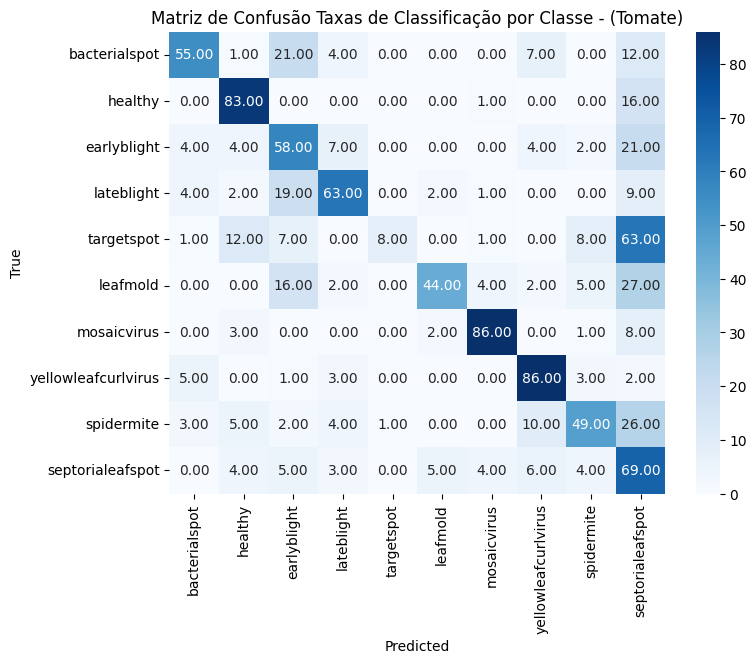

In [89]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#print(y_pred_classes)
#print(categories)
confusion = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix: ")
print(confusion)

row_sums = confusion.sum(axis=1, keepdims=True)
percent_confusion = (confusion / row_sums) * 100

# Plotar a matriz de confusão como uma imagem
plt.figure(figsize=(8, 6))
sns.heatmap(percent_confusion, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão Taxas de Classificação por Classe - (Tomate)')
plt.show()

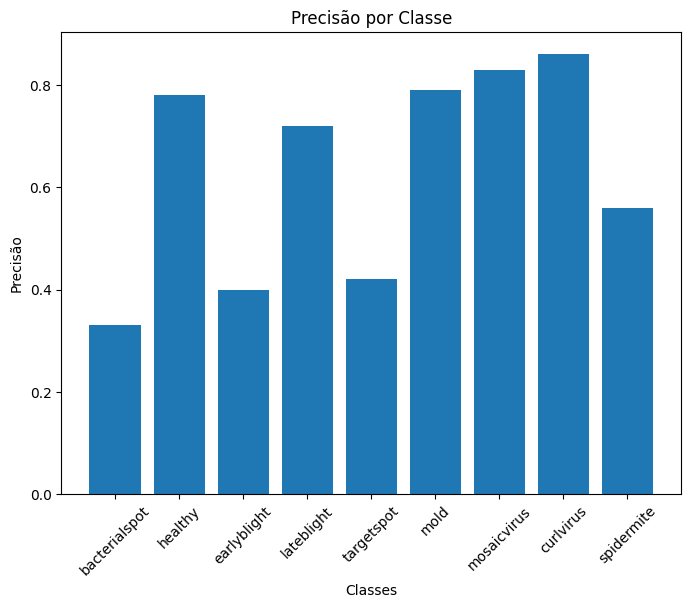

In [91]:
classification = classification_report(y_test, y_pred_classes, target_names=categories, zero_division=1)

# Extrair as métricas de precisão por classe
categories_classification = []
precision = []

# Iterar pelas linhas do relatório e extrair as métricas de precisão
for line in lines[2:-3]:
    parts = line.split()
    if len(parts) >= 4:
        category = parts[0]
        p = float(parts[3])
        categories_classification.append(category)
        precision.append(p)

# Plotar um gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categories_classification, precision)
plt.xlabel('Classes')
plt.ylabel('Precisão')
plt.title('Precisão por Classe')
plt.xticks(rotation=45)
plt.show()

In [92]:
# generate a new uuid for the model
model_uuid = uuid.uuid4()
# save the model
model.save("models/" + str(model_uuid) + ".keras")

print("Model Saved Successfully: " + str(model_uuid));